In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from tqdm import tqdm,trange
from sklearn.model_selection import train_test_split
import sklearn.metrics

import torch
import torch.nn as nn
import torch.nn.functional as F

import warnings
warnings.filterwarnings("ignore")

In [2]:
df_train0 = pd.read_json('../input/deepfake/metadata0.json')
df_train1 = pd.read_json('../input/deepfake/metadata1.json')
df_train2 = pd.read_json('../input/deepfake/metadata2.json')
df_train3 = pd.read_json('../input/deepfake/metadata3.json')
df_train4 = pd.read_json('../input/deepfake/metadata4.json')
df_train5 = pd.read_json('../input/deepfake/metadata5.json')
df_train6 = pd.read_json('../input/deepfake/metadata6.json')
df_train7 = pd.read_json('../input/deepfake/metadata7.json')
df_train8 = pd.read_json('../input/deepfake/metadata8.json')
df_train9 = pd.read_json('../input/deepfake/metadata9.json')
df_train10 = pd.read_json('../input/deepfake/metadata10.json')
df_train11 = pd.read_json('../input/deepfake/metadata11.json')
df_train12 = pd.read_json('../input/deepfake/metadata12.json')
df_train13 = pd.read_json('../input/deepfake/metadata13.json')
df_train14 = pd.read_json('../input/deepfake/metadata14.json')
df_train15 = pd.read_json('../input/deepfake/metadata15.json')
df_train16 = pd.read_json('../input/deepfake/metadata16.json')
df_train17 = pd.read_json('../input/deepfake/metadata17.json')
df_train18 = pd.read_json('../input/deepfake/metadata18.json')
df_train19 = pd.read_json('../input/deepfake/metadata19.json')
df_train20 = pd.read_json('../input/deepfake/metadata20.json')
df_train21 = pd.read_json('../input/deepfake/metadata21.json')
df_train22 = pd.read_json('../input/deepfake/metadata22.json')
df_train23 = pd.read_json('../input/deepfake/metadata23.json')
df_train24 = pd.read_json('../input/deepfake/metadata24.json')
df_train25 = pd.read_json('../input/deepfake/metadata25.json')
df_train26 = pd.read_json('../input/deepfake/metadata26.json')
df_train27 = pd.read_json('../input/deepfake/metadata27.json')
df_train28 = pd.read_json('../input/deepfake/metadata28.json')
df_train29 = pd.read_json('../input/deepfake/metadata29.json')
df_train30 = pd.read_json('../input/deepfake/metadata30.json')
df_train31 = pd.read_json('../input/deepfake/metadata31.json')
df_train32 = pd.read_json('../input/deepfake/metadata32.json')
df_train33 = pd.read_json('../input/deepfake/metadata33.json')
df_train34 = pd.read_json('../input/deepfake/metadata34.json')
df_train35 = pd.read_json('../input/deepfake/metadata35.json')
df_train36 = pd.read_json('../input/deepfake/metadata36.json')
df_train37 = pd.read_json('../input/deepfake/metadata37.json')
df_train38 = pd.read_json('../input/deepfake/metadata38.json')
df_train39 = pd.read_json('../input/deepfake/metadata39.json')
df_train40 = pd.read_json('../input/deepfake/metadata40.json')
df_train41 = pd.read_json('../input/deepfake/metadata41.json')
df_train42 = pd.read_json('../input/deepfake/metadata42.json')
df_train43 = pd.read_json('../input/deepfake/metadata43.json')
df_train44 = pd.read_json('../input/deepfake/metadata44.json')
df_train45 = pd.read_json('../input/deepfake/metadata45.json')
df_train46 = pd.read_json('../input/deepfake/metadata46.json')
df_val1 = pd.read_json('../input/deepfake/metadata47.json')
df_val2 = pd.read_json('../input/deepfake/metadata48.json')
df_val3 = pd.read_json('../input/deepfake/metadata49.json')
df_trains = [df_train0 ,df_train1, df_train2, df_train3, df_train4,
             df_train5, df_train6, df_train7, df_train8, df_train9,df_train10,
            df_train11, df_train12, df_train13, df_train14, df_train15,df_train16, 
            df_train17, df_train18, df_train19, df_train20, df_train21, df_train22, 
            df_train23, df_train24, df_train25, df_train26, df_train27, df_train28, 
            df_train29, df_train30, df_train31, df_train32, df_train33, df_train34,
            df_train34, df_train35, df_train36, df_train37, df_train38, df_train39,
            df_train40, df_train41, df_train42, df_train43, df_train44, df_train45,
            df_train46]
df_vals=[df_val1, df_val2, df_val3]
nums = list(range(len(df_trains)+1))
LABELS = ['REAL','FAKE']
val_nums=[47, 48, 49]

In [3]:
def get_path(num,x):
    num=str(num)
    if len(num)==2:
        path='../input/deepfake/DeepFake'+num+'/DeepFake'+num+'/' + x.replace('.mp4', '') + '.jpg'
    else:
        path='../input/deepfake/DeepFake0'+num+'/DeepFake0'+num+'/' + x.replace('.mp4', '') + '.jpg'
    if not os.path.exists(path):
       raise Exception
    return path
paths=[]
y=[]
for df_train,num in tqdm(zip(df_trains,nums),total=len(df_trains)):
    images = list(df_train.columns.values)
    for x in images:
        try:
            paths.append(get_path(num,x))
            y.append(LABELS.index(df_train[x]['label']))
        except Exception as err:
            #print(err)
            pass

val_paths=[]
val_y=[]
for df_val,num in tqdm(zip(df_vals,val_nums),total=len(df_vals)):
    images = list(df_val.columns.values)
    for x in images:
        try:
            val_paths.append(get_path(num,x))
            val_y.append(LABELS.index(df_val[x]['label']))
        except Exception as err:
            #print(err)
            pass

100%|██████████| 3/3 [00:02<00:00,  1.43it/s]


In [4]:
def read_img(path):
    return cv2.cvtColor(cv2.imread(path),cv2.COLOR_BGR2RGB)

def shuffle(X,y):
    new_train=[]
    for m,n in zip(X,y):
        new_train.append([m,n])
    random.shuffle(new_train)
    X,y=[],[]
    for x in new_train:
        X.append(x[0])
        y.append(x[1])
    return X,y

import random
def get_random_sampling(paths, y, val_paths, val_y):
  real=[]
  fake=[]
  for m,n in zip(paths,y):
      if n==0:
          real.append(m)
      else:
          fake.append(m)
  # fake=random.sample(fake,len(real))
  paths,y=[],[]
  for x in real:
      paths.append(x)
      y.append(0)
  for x in fake:
      paths.append(x)
      y.append(1)

  real=[]
  fake=[]
  for m,n in zip(val_paths,val_y):
      if n==0:
          real.append(m)
      else:
          fake.append(m)
  # fake=random.sample(fake,len(real))
  val_paths,val_y=[],[]
  for x in real:
      val_paths.append(x)
      val_y.append(0)
  for x in fake:
      val_paths.append(x)
      val_y.append(1)

  X=[]
  for img in tqdm(paths):
      X.append(read_img(img))
  val_X=[]
  for img in tqdm(val_paths):
      val_X.append(read_img(img))

  # Balance with ffhq dataset
  ffhq = os.listdir('../input/ffhq-face-data-set/thumbnails128x128')
  X_ = []
  for file in tqdm(ffhq):
    im = read_img(f'../input/ffhq-face-data-set/thumbnails128x128/{file}')
    im = cv2.resize(im, (150,150))
    X_.append(im)
  random.shuffle(X_)

  for i in range(64773 - 12130):
    X.append(X_[i])
    y.append(0)
  del X_[0:64773 - 12130]
  for i in range(6108 - 1258):
    val_X.append(X_[i])
    val_y.append(0)

  X, y = shuffle(X,y)
  val_X, val_y = shuffle(val_X,val_y)

  return X, val_X, y, val_y

In [5]:
from torch.utils.data import Dataset, DataLoader
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

class ImageDataset(Dataset):
    def __init__(self, X, y, training=True, transform=None):
        self.X = X
        self.y = y
        self.transform = transform
        self.training = training

    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()
        
        img = self.X[idx]

        if self.transform is not None:
          res = self.transform(image=img)
          img = res['image']
        
        img = np.rollaxis(img, 2, 0)
        # img = np.array(img).astype(np.float32) / 255.

        labels = self.y[idx]
        labels = np.array(labels).astype(np.float32)
        return [img, labels]

In [6]:
!pip install pytorchcv --quiet
from pytorchcv.model_provider import get_model
model = get_model("inceptionv4", pretrained=True)
# model = get_model("resnet18", pretrained=True)
model = nn.Sequential(*list(model.children())[:-1]) # Remove original output layer

In [7]:
for parameter in model.parameters():
    parameter.requires_grad = False



In [8]:
#model[0].final_block.pool = nn.Sequential(nn.AdaptiveAvgPool2d(1))
 model[0].final_pool = nn.Sequential(nn.AdaptiveAvgPool2d(1))

In [9]:
class Head(torch.nn.Module):
  def __init__(self, in_f, out_f):
    super(Head, self).__init__()
    
    self.f = nn.Flatten()
    self.l = nn.Linear(in_f, 512)
    self.d = nn.Dropout(0.75)
    self.o = nn.Linear(512, out_f)
    self.b1 = nn.BatchNorm1d(in_f)
    self.b2 = nn.BatchNorm1d(512)
    self.r = nn.ReLU()

  def forward(self, x):
    x = self.f(x)
    x = self.b1(x)
    x = self.d(x)

    x = self.l(x)
    x = self.r(x)
    x = self.b2(x)
    x = self.d(x)

    out = self.o(x)
    return out

In [10]:
class FCN(torch.nn.Module):
  def __init__(self, base, in_f):
    super(FCN, self).__init__()
    self.base = base
    self.h1 = Head(in_f, 1)
  
  def forward(self, x):
    x = self.base(x)
    return self.h1(x)

model = FCN(model, 1536)

In [11]:
 !pip install torchtoolbox --quiet
 from torchtoolbox.tools import summary

 model.cuda()
 summary(model, torch.rand((1, 3, 150, 150)).cuda())

--------------------------------------------------------------------------------
        Layer (type)               Output Shape          Params    FLOPs(M+A) #
            Conv2d-1            [1, 32, 74, 74]             864         9287296
       BatchNorm2d-2            [1, 32, 74, 74]             128          350464
              ReLU-3            [1, 32, 74, 74]               0               0
        InceptConv-4            [1, 32, 74, 74]               0               0
            Conv2d-5            [1, 32, 72, 72]            9216        95385600
       BatchNorm2d-6            [1, 32, 72, 72]             128          331776
              ReLU-7            [1, 32, 72, 72]               0               0
        InceptConv-8            [1, 32, 72, 72]               0               0
            Conv2d-9            [1, 64, 72, 72]           18432       190771200
      BatchNorm2d-10            [1, 64, 72, 72]             256          663552
             ReLU-11            [1, 64,

In [12]:
def criterion1(pred1, targets):
  l1 = F.binary_cross_entropy(F.sigmoid(pred1), targets)
  return l1

def train_model(epoch, optimizer, scheduler=None, history=None):
    model.train()
    total_loss = 0
    
    t = tqdm(train_loader)
    for i, (img_batch, y_batch) in enumerate(t):
        img_batch = img_batch.cuda().float()
        y_batch = y_batch.cuda().float()

        optimizer.zero_grad()

        out = model(img_batch)
        loss = criterion1(out, y_batch)

        total_loss += loss
        t.set_description(f'Epoch {epoch+1}/{n_epochs}, LR: %6f, Loss: %.4f'%(optimizer.state_dict()['param_groups'][0]['lr'],total_loss/(i+1)))

        if history is not None:
          history.loc[epoch + i / len(X), 'train_loss'] = loss.data.cpu().numpy()
          history.loc[epoch + i / len(X), 'lr'] = optimizer.state_dict()['param_groups'][0]['lr']

        loss.backward()
        optimizer.step()
        if scheduler is not None:
          scheduler.step()

def evaluate_model(epoch, scheduler=None, history=None):
    model.eval()
    loss = 0
    pred = []
    real = []
    with torch.no_grad():
        for img_batch, y_batch in val_loader:
            img_batch = img_batch.cuda().float()
            y_batch = y_batch.cuda().float()

            o1 = model(img_batch)
            l1 = criterion1(o1, y_batch)
            loss += l1
            
            for j in o1:
              pred.append(F.sigmoid(j))
            for i in y_batch:
              real.append(i.data.cpu())
    
    pred = [p.data.cpu().numpy() for p in pred]
    pred2 = pred
    pred = [np.round(p) for p in pred]
    pred = np.array(pred)
    acc = sklearn.metrics.recall_score(real, pred, average='macro')

    real = [r.item() for r in real]
    pred2 = np.array(pred2).clip(0.1, 0.9)

    loss /= len(val_loader)
    
    if history is not None:
        history.loc[epoch, 'dev_loss'] = loss.cpu().numpy()
    
    if scheduler is not None:
      scheduler.step(loss)

    print(f'Dev loss: %.4f, Acc: %.6f'%(loss,acc))
    
    return loss

In [13]:
X, val_X, y, val_y = get_random_sampling(paths, y, val_paths, val_y)

print('There are '+str(y.count(1))+' fake train samples')
print('There are '+str(y.count(0))+' real train samples')
print('There are '+str(val_y.count(1))+' fake val samples')
print('There are '+str(val_y.count(0))+' real val samples')

100%|██████████| 70000/70000 [03:58<00:00, 293.46it/s]


There are 64773 fake train samples
There are 64773 real train samples
There are 6108 fake val samples
There are 6108 real val samples


In [14]:
import albumentations
from albumentations.augmentations.transforms import ShiftScaleRotate, HorizontalFlip, Normalize, RandomBrightnessContrast, MotionBlur, Blur, GaussNoise, JpegCompression
train_transform = albumentations.Compose([
                                          ShiftScaleRotate(p=0.3, scale_limit=0.25, border_mode=1, rotate_limit=25),
                                          HorizontalFlip(p=0.2),
                                          RandomBrightnessContrast(p=0.3, brightness_limit=0.25, contrast_limit=0.5),
                                          MotionBlur(p=.2),
                                          GaussNoise(p=.2),
                                          JpegCompression(p=.2, quality_lower=50),
                                          Normalize()
])
val_transform = albumentations.Compose([
                                          Normalize()
])

train_dataset = ImageDataset(X, y, transform=train_transform)
val_dataset = ImageDataset(val_X, val_y, transform=val_transform)

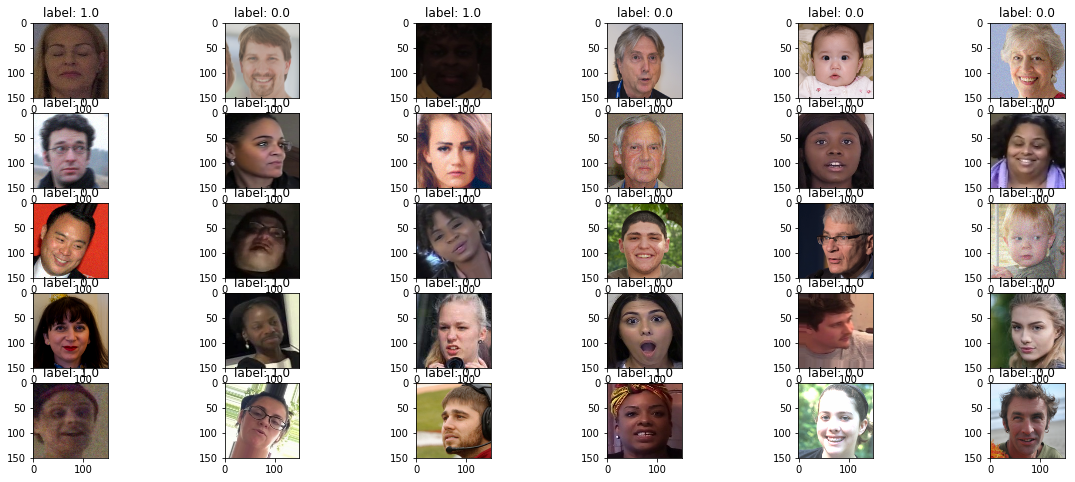

In [15]:
nrow, ncol = 5, 6
fig, axes = plt.subplots(nrow, ncol, figsize=(20, 8))
axes = axes.flatten()
for i, ax in enumerate(axes):
    image, label = train_dataset[i]
    image = np.rollaxis(image, 0, 3)
    image = image*std + mean
    image = np.clip(image, 0., 1.)
    ax.imshow(image)
    ax.set_title(f'label: {label}')

In [16]:
import gc

history = pd.DataFrame()
history2 = pd.DataFrame()

torch.cuda.empty_cache()
gc.collect()

best = 1e10
n_epochs = 10
batch_size = 128

train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True, num_workers=4)
val_loader = DataLoader(dataset=val_dataset, batch_size=batch_size, shuffle=False, num_workers=0)

model = model.cuda()

optimizer = torch.optim.AdamW(model.parameters(), lr=0.001)

scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience=5, mode='min', factor=0.7, verbose=True, min_lr=1e-5)

for epoch in range(n_epochs):
    torch.cuda.empty_cache()
    gc.collect()

    train_model(epoch, optimizer, scheduler=None, history=history)
    
    loss = evaluate_model(epoch, scheduler=scheduler, history=history2)
    
    if loss < best:
      best = loss
      print(f'Saving best model...')
      torch.save(model.state_dict(), f'model.pth')

Epoch 1/10, LR: 0.001000, Loss: 0.5132: 100%|██████████| 1013/1013 [03:42<00:00,  4.56it/s]


Dev loss: 0.4271, Acc: 0.804355
Saving best model...


Epoch 2/10, LR: 0.001000, Loss: 0.4922: 100%|██████████| 1013/1013 [03:42<00:00,  4.56it/s]


Dev loss: 0.3991, Acc: 0.828831
Saving best model...


Epoch 3/10, LR: 0.001000, Loss: 0.4905: 100%|██████████| 1013/1013 [03:45<00:00,  4.49it/s]


Dev loss: 0.3992, Acc: 0.830141


Epoch 4/10, LR: 0.001000, Loss: 0.4874: 100%|██████████| 1013/1013 [03:40<00:00,  4.59it/s]


Dev loss: 0.3902, Acc: 0.841110
Saving best model...


Epoch 5/10, LR: 0.001000, Loss: 0.4861: 100%|██████████| 1013/1013 [03:40<00:00,  4.60it/s]


Dev loss: 0.3905, Acc: 0.838982


Epoch 6/10, LR: 0.001000, Loss: 0.4858: 100%|██████████| 1013/1013 [03:37<00:00,  4.65it/s]


Dev loss: 0.4103, Acc: 0.811395


Epoch 7/10, LR: 0.001000, Loss: 0.4814: 100%|██████████| 1013/1013 [03:34<00:00,  4.72it/s]


Dev loss: 0.3809, Acc: 0.843238
Saving best model...


Epoch 8/10, LR: 0.001000, Loss: 0.4810: 100%|██████████| 1013/1013 [03:31<00:00,  4.78it/s]


Dev loss: 0.4015, Acc: 0.821709


Epoch 9/10, LR: 0.001000, Loss: 0.4782: 100%|██████████| 1013/1013 [03:32<00:00,  4.77it/s]


Dev loss: 0.3853, Acc: 0.839473


Epoch 10/10, LR: 0.001000, Loss: 0.4766: 100%|██████████| 1013/1013 [03:32<00:00,  4.76it/s]


Dev loss: 0.3931, Acc: 0.832105


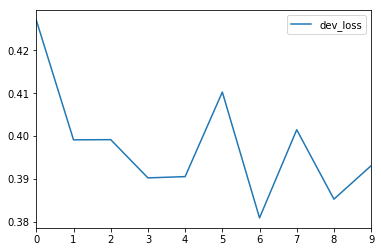

In [17]:
history2.plot()